In [2]:
import numpy as np
import matplotlib.pyplot as plt
import random
from jupyterthemes import jtplot
jtplot.style()

$$ \frac{dS_t}{S_t} = \sigma dB_t $$

In [3]:
def brownian_motion(steps):
    t = np.zeros(steps, dtype = np.float32)
    N = len(t)
    for i in range(1, N):
        t[i] = t[i-1] + random.gauss(0, 1/N)
    
    return t

def geometric_brownian_motion(steps, mu = 0, sigma = 1):
    t = np.zeros(steps, dtype = np.float32)
    t[0] = 1.
    N, dt = len(t), 1/len(t)
    for i in range(1, N):
        t[i] = t[i-1] + mu * dt + sigma * random.gauss(0, dt)
    
    return t

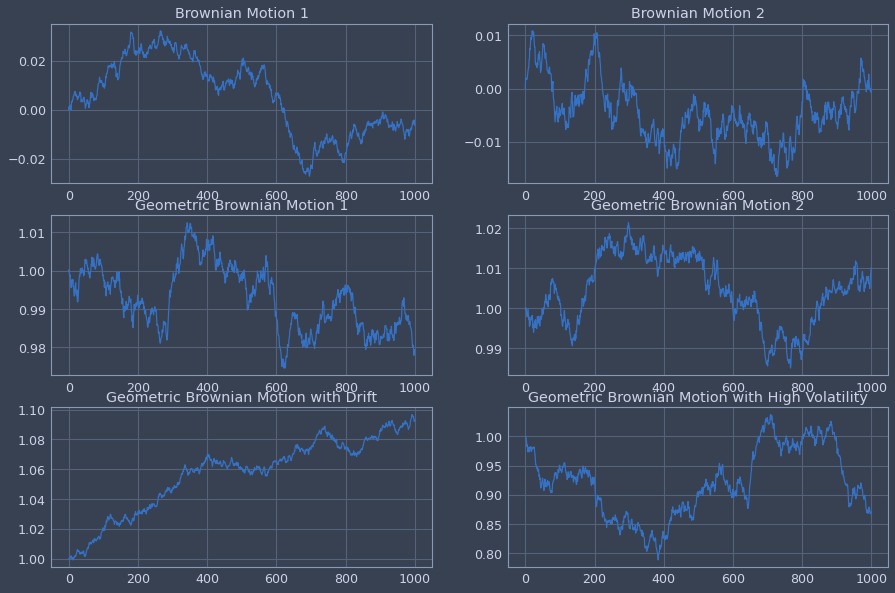

In [4]:
d = 1000
X = np.arange(d)
plt.figure(figsize=(15,10))

time_series = {
    'Brownian Motion 1': brownian_motion(d), 
    'Brownian Motion 2': brownian_motion(d), 
    'Geometric Brownian Motion 1': geometric_brownian_motion(d),
    'Geometric Brownian Motion 2': geometric_brownian_motion(d), 
    'Geometric Brownian Motion with Drift': geometric_brownian_motion(d, mu=0.05),
    'Geometric Brownian Motion with Higher Volatility': geometric_brownian_motion(d, sigma=5)
}

for i, title in enumerate(time_series):
    plt.subplot(320 + i + 1, title=title)
    plt.plot(X, time_series[title])

# Weierstrass function
Continuous everywhere but differentiable nowhere (like the Brownian motion)

$$ f(x) = \sum_{n=0}^\infty a^n cos(b^n \pi x) $$
$$ab > 1 + \frac{3}{2} \pi $$
$$0 < a < 1 \ and \ 0 < b, b \ odd \in \mathbb{N}$$

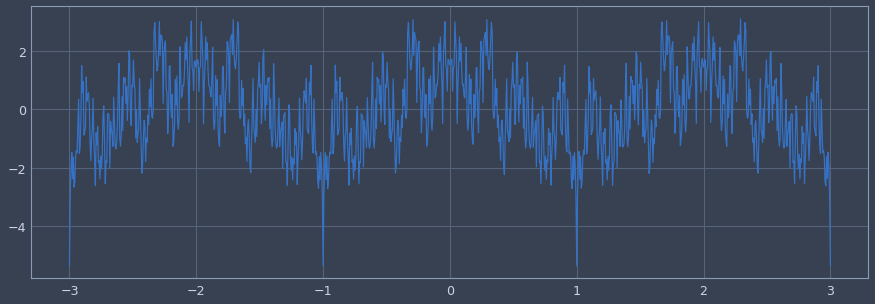

In [27]:
# Let...
inf = 1e7
eps = 1e-4
b = 7
a = (1 + 1.5 * np.pi) / b + eps

def weierstrass_sum(x, a, b):
    acc = 0
    for n in range(0, int(inf)):
        n = float(n)
        summand = a ** n * np.cos(b ** n * np.pi * x)
        if np.abs(summand) > eps:
            acc += summand
        else:
            break
    return acc

def weierstrass(X, a, b):
    X = np.array(X)
    for i in range(len(X)):
        X[i] = weierstrass_sum(X[i], a, b)
    return X

X = np.linspace(-3, 3, int(1e3))
Y = weierstrass(X, a, b)

plt.figure(1, figsize=(15,5))
plt.plot(X, Y)